In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import json
import json
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append('./src')
from data import load_data
from data_transformer import CustomDataTransformer

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=.2, stratify=y)
    train_errors, val_errors = [], []
    for m in range(5, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(f1_score(y_train[:m], y_train_predict,average='weighted'))
        val_errors.append(f1_score(y_val, y_val_predict,average='weighted'))
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")

config_file = "../config.json"

with open(config_file, 'r') as f:
    config = json.load(f)

train_data_path = config["train_data_path"]
df = load_data(train_data_path)
    
X = df.drop(columns='cluster')
y = df.cluster

model = Pipeline([
        ('data_tf', CustomDataTransformer()),
        ('preprocessor', StandardScaler()),
        ('gbc', GradientBoostingClassifier())
    ])

plot_learning_curves(model, X, y)

KeyboardInterrupt: 

/Users/mas/Documents/ml-projects/oil-well-cluster-predictor/myenv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


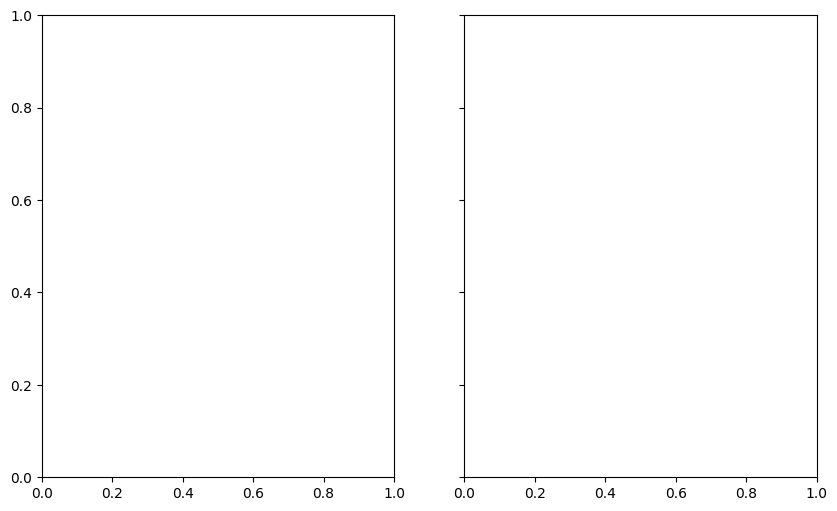

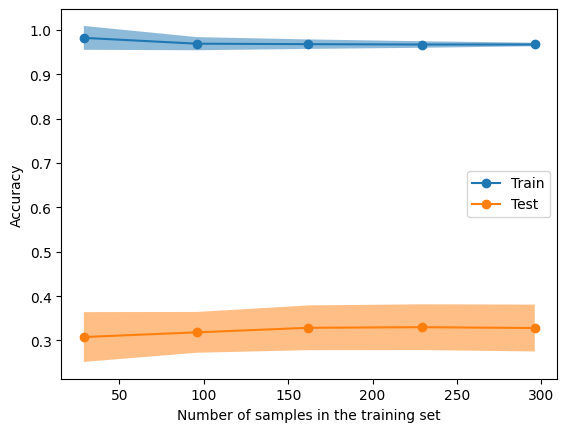

In [17]:
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, StratifiedShuffleSplit
common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": StratifiedShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

LearningCurveDisplay.from_estimator(model, **common_params)